In [1]:
# modules
from imports import np, plt, iio, cv2, gaussian, Path, gf, filters, data, fusion, recalage

# functions
from imports import gray_to_rgb, plot_images

# variables
from imports import BASE_DIR, multi_exposure_dataset, multi_focus_dataset, ours_dataset, multi_exposure_sample, multi_exposure_sample, multi_focus_sample, ours_sample, gray_sample

# Guided filtering

![guided_filter_schematic.png](images/guided_filter_schematic.png)

Guided filtering {cite}`guided-filter` is a smoothing method which tries to respect image structure (and most notably edges). In this regard, it resembles bilateral filtering. However, guided filtering is able to preserve edges of *another* image.
Guided filtering takes two images, $P$ and $I$ as inputs and produces one image $O$ as output.
- $P$ is called the input image. $O$ is designed to look like $P$.
- $I$ is called the guidance image. $O$ is structured like $I$ in that it should share the same edges.

Concretely speaking, to produce $O_i$ the output at pixel $i$, we look at $w_i$ a window centered at $i$. We try to construct an affine transformation of the corresponding window in $I$, so that the window produces looks like the corresponding window in $P$. This means that we minimize over $a_i$ and $b_i$ the energy
\begin{equation*}
E(a_i, b_i) = \sum_{k \in w_i} ( a_i I_k + b_i - P_k)^2 + \varepsilon a_i^2
\end{equation*}
where we added a regularisation term $\varepsilon a_i^2$.

There are some additional details :
- if $I$ is RGB, we look at $\mathbf{a}_i^T \mathbf{I}_i$ instead
- if $P$ is RGB, we realize 3 filtering for the 3 $P$ channels

In our case, $I$ will be RGB and $P$ gray.

## Gray guide

In [2]:
input = multi_focus_sample[0].mean(axis=-1)
guide = multi_focus_sample[1].mean(axis=-1)
output = filters.guided_filter(input, guide, r=20, eps=5e-2)

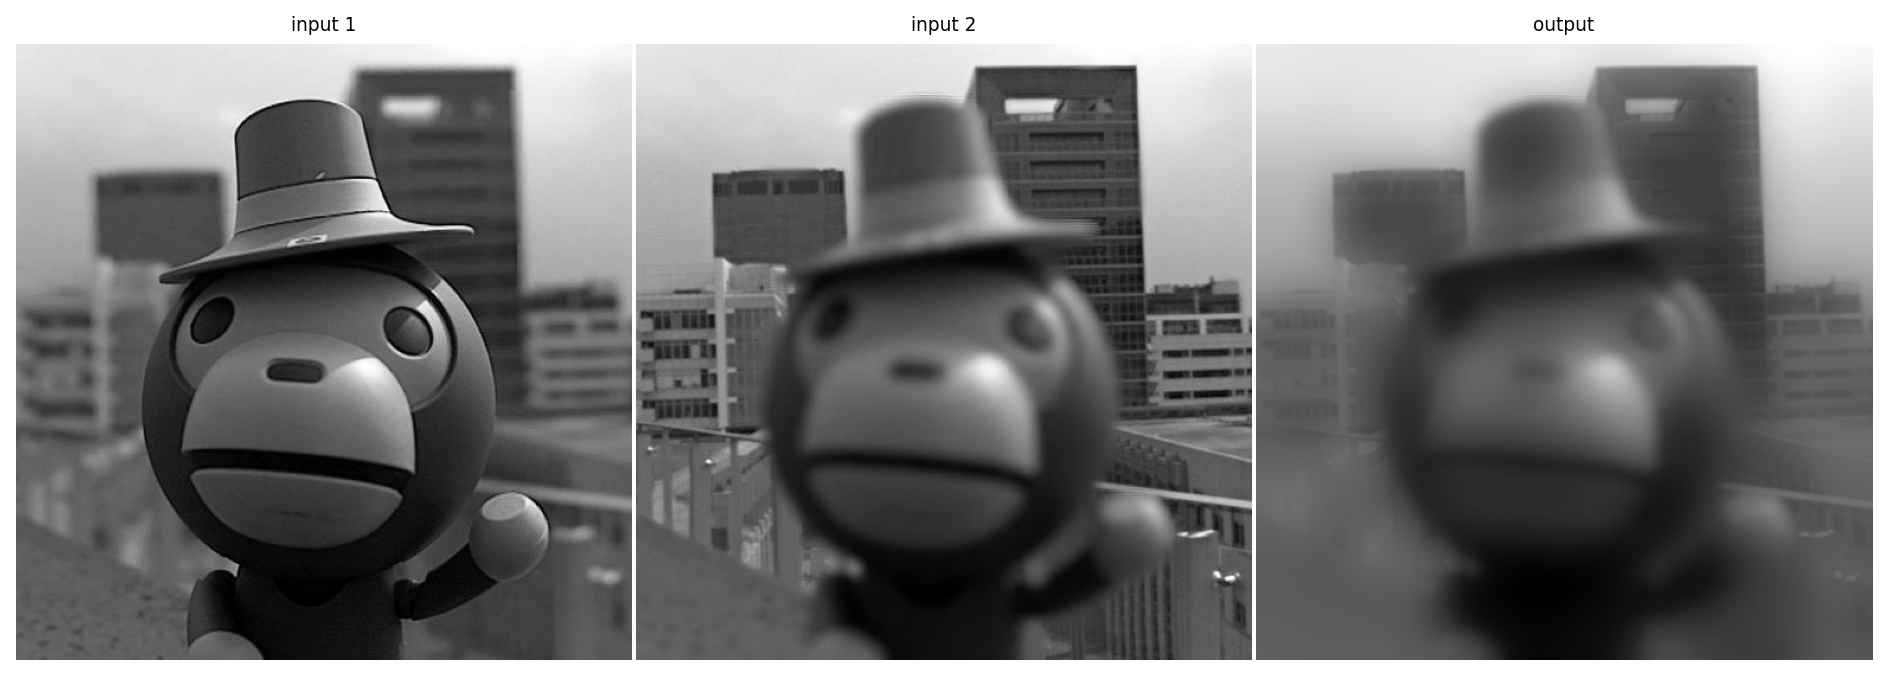

In [3]:
plot_images(input, guide, output,
            labels=['input 1', 'input 2', 'output'])

Notably, the edges of the buildings in the backgrounds remain sharp.

## RGB guide

In [4]:
input = multi_focus_sample[0]
guide = multi_focus_sample[1]
output = filters.guided_filter(input, guide, r=20, eps=5e-2)

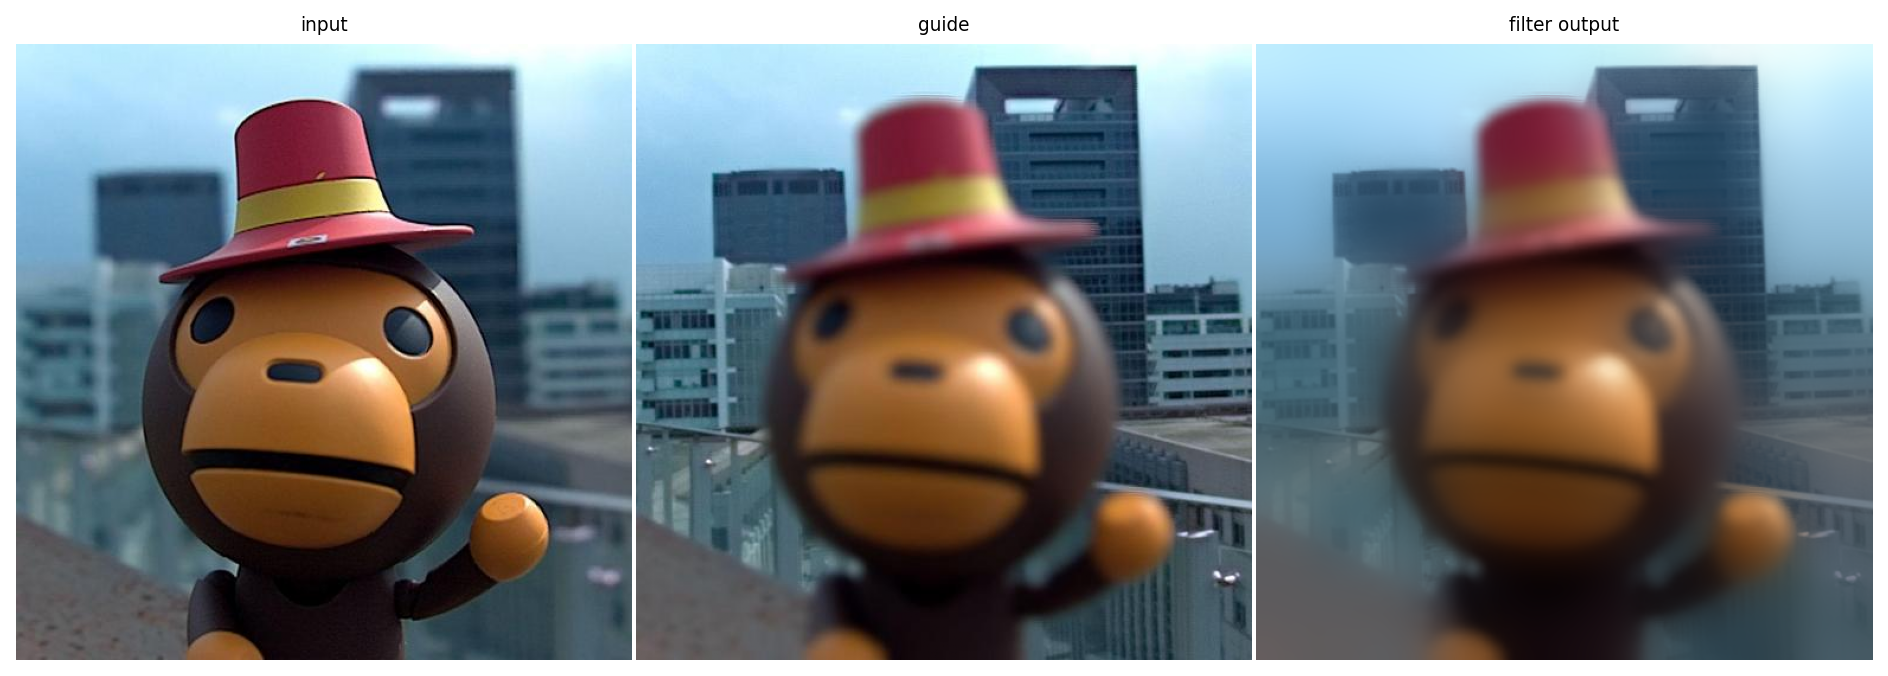

In [5]:
plot_images(input, guide, output,
            labels=['input', 'guide', 'filter output'])